***Discovering the important features and Reducing investment risk***

My goal for this project was to reduce risk for investers when deciding if a client is worth the Investment/loan. The Data ws obtained from the lendingclub. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load the Feature Descriptions 
data_info = pd.read_csv('/content/drive/My Drive/Colab Datasets/lending_club_info.csv', index_col= 'LoanStatNew')
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [ ]:
# Create a function that will allow us to define the features
def feature_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [ ]:
#Sanity Check
feature_info('mort_acc')

Number of mortgage accounts.


In [ ]:
#Load the Data 
df = pd.read_csv('/content/drive/My Drive/Colab Datasets/lending_club_loan_two.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


Exploratory Data Analysis 
Understand the importance of each variable, summary statistics and Visualizations

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


**Exploratory Data Analysis** 

Goal: Get an understanding of the Data 

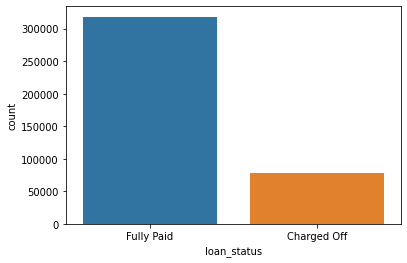

In [ ]:
sns.countplot(x = df['loan_status'])
plt.show()

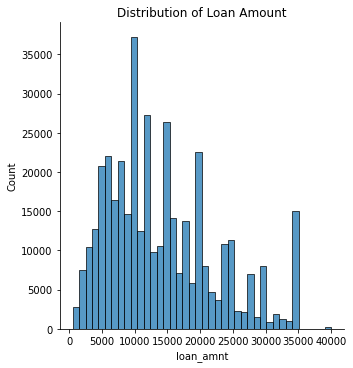

In [ ]:

sns.displot(df['loan_amnt'],kind = "hist",bins = 40)
plt.title('Distribution of Loan Amount')
plt.show()

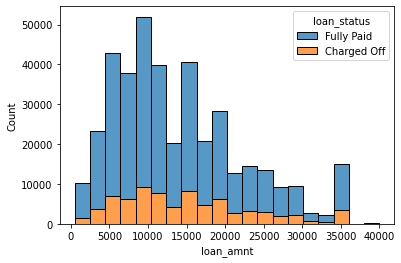

In [ ]:
sns.histplot(x = df['loan_amnt'], 
             hue = df['loan_status'],
             bins = 20, multiple = 'stack' )
plt.show()

In [ ]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


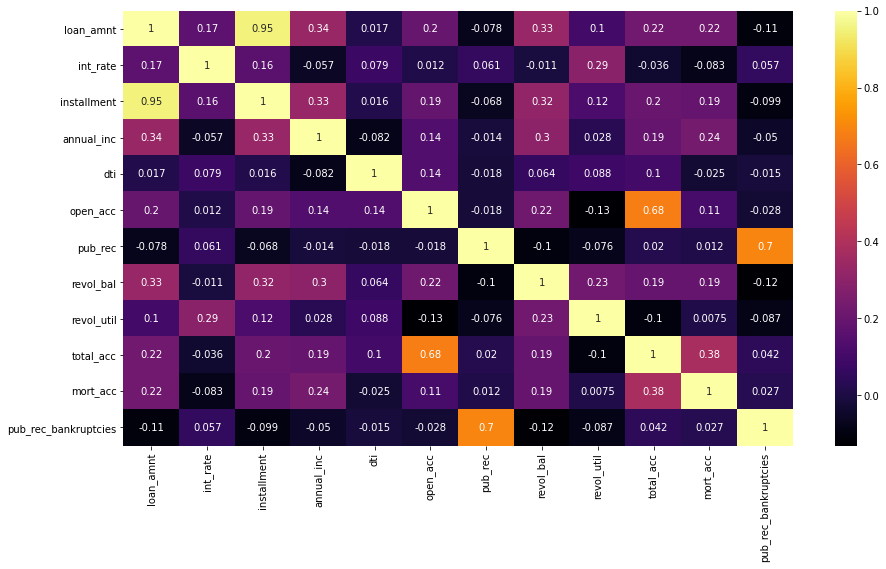

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='inferno')
plt.show()

Installment and Loan amount has almost perfect correlation so lets visualize the Features

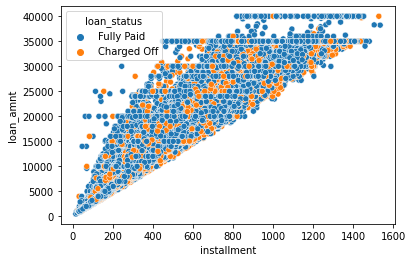

In [ ]:
sns.scatterplot(x='installment', y='loan_amnt',hue= df.loan_status, data = df)
plt.show()

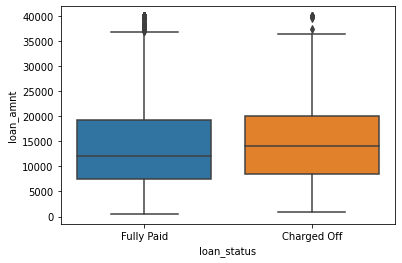

In [ ]:
sns.boxplot(x='loan_status', y='loan_amnt', data = df)
plt.show()

In [ ]:
df['loan_amnt'].groupby(df['loan_status']).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [ ]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

In [ ]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

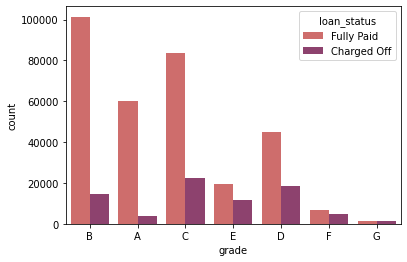

In [ ]:
sns.countplot(x='grade',data=df, hue='loan_status',palette='flare')
plt.show()

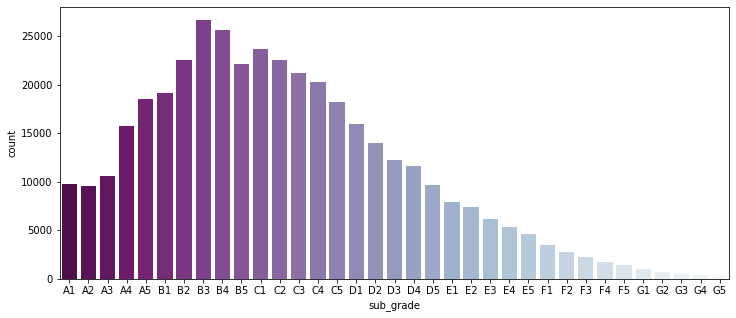

In [ ]:
plt.figure(figsize=(12,5))
grade_sort = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df, order=grade_sort,palette= 'BuPu_r')
plt.show()

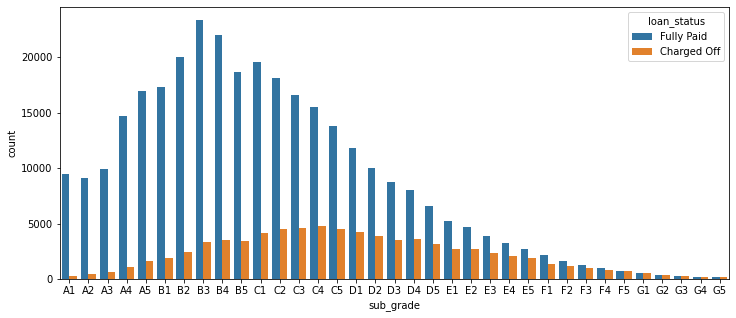

In [ ]:
plt.figure(figsize=(12,5))
grade_sort = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', hue='loan_status', data=df, order=grade_sort)
plt.show()

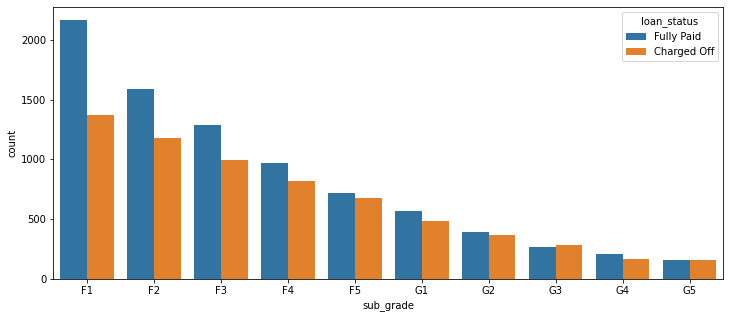

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='sub_grade', hue='loan_status', data=df, order=('F1','F2','F3','F4','F5','G1','G2','G3','G4','G5'))
plt.show()

In [ ]:
df['loan_repaid'] = df['loan_status'].map({"Fully Paid":1, "Charged Off":0})

In [ ]:
df[['loan_repaid','loan_status']].head(10)

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
5,1,Fully Paid
6,1,Fully Paid
7,1,Fully Paid
8,1,Fully Paid
9,1,Fully Paid


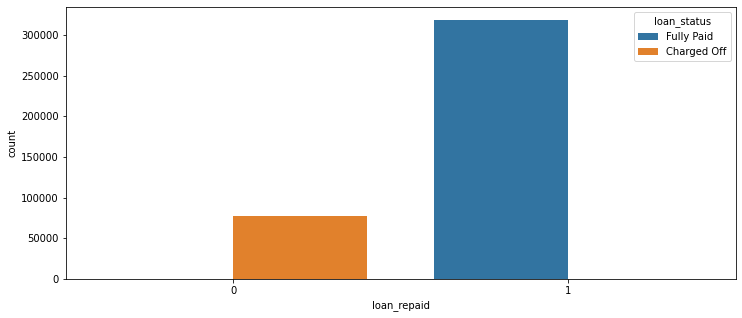

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='loan_repaid', hue='loan_status', data=df )
plt.show()

In [ ]:
df['loan_amnt'].value_counts()

10000.0    27668
12000.0    21366
15000.0    19903
20000.0    18969
35000.0    14576
           ...  
37450.0        1
36775.0        1
725.0          1
36225.0        1
35475.0        1
Name: loan_amnt, Length: 1397, dtype: int64

In [ ]:
df['loan_amnt']= df['loan_amnt'].round(decimals=-3)

In [ ]:
df['loan_amnt'].value_counts()

10000.0    39020
12000.0    28429
8000.0     25172
6000.0     24071
15000.0    23636
20000.0    22948
5000.0     19357
35000.0    14779
16000.0    14754
7000.0     14659
4000.0     14272
18000.0    14100
14000.0    13416
9000.0     11326
24000.0    11248
25000.0    10997
11000.0    10581
2000.0      9125
3000.0      8849
13000.0     8703
30000.0     7966
21000.0     7493
28000.0     6894
17000.0     6517
22000.0     5422
19000.0     5418
23000.0     3053
1000.0      2738
26000.0     2533
32000.0     2085
27000.0     1694
29000.0     1503
34000.0     1050
33000.0      984
31000.0      977
40000.0      183
36000.0       51
38000.0       11
37000.0        8
39000.0        4
0.0            4
Name: loan_amnt, dtype: int64

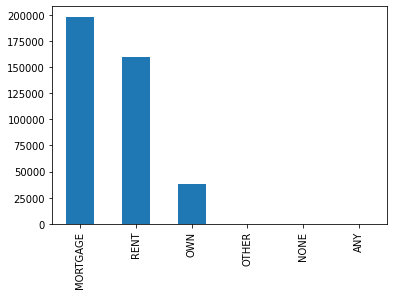

In [ ]:
df.home_ownership.value_counts().plot(kind= 'bar')

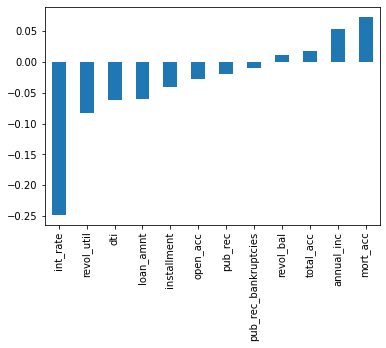

In [ ]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

In [ ]:
def outlier_count(col, data=df):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cols = list(df.select_dtypes(include= numerics))
for col in cols:
    outlier_count(col)

---------------loan_amnt---------------
Number of outliers: 187
Percent of data that is outlier: 0.05%
---------------int_rate---------------
Number of outliers: 3777
Percent of data that is outlier: 0.95%
---------------installment---------------
Number of outliers: 11250
Percent of data that is outlier: 2.84%
---------------annual_inc---------------
Number of outliers: 16700
Percent of data that is outlier: 4.22%
---------------dti---------------
Number of outliers: 275
Percent of data that is outlier: 0.07%
---------------open_acc---------------
Number of outliers: 10307
Percent of data that is outlier: 2.6%
---------------pub_rec---------------
Number of outliers: 57758
Percent of data that is outlier: 14.58%
---------------revol_bal---------------
Number of outliers: 21259
Percent of data that is outlier: 5.37%
---------------revol_util---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------total_acc---------------
Number of outliers: 8499
Percen

In [ ]:
df.home_ownership = df.home_ownership.replace('ANY', 'OTHER')

In [ ]:
df.home_ownership.value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          115
NONE            31
Name: home_ownership, dtype: int64

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values(by = 'percent_missing', ascending= False)

,column_name,percent_missing
mort_acc,mort_acc,9.543469
emp_title,emp_title,5.789208
emp_length,emp_length,4.621115
title,title,0.443148
pub_rec_bankruptcies,pub_rec_bankruptcies,0.135091
revol_util,revol_util,0.069692
dti,dti,0.000000
address,address,0.000000
application_type,application_type,0.000000
initial_list_status,initial_list_status,0.000000


In [ ]:
df[['total_acc','mort_acc']]

,total_acc,mort_acc
0,25.0,0.0
1,27.0,3.0
2,26.0,0.0
3,13.0,0.0
4,43.0,1.0
...,...,...
396025,23.0,0.0
396026,8.0,1.0
396027,23.0,0.0
396028,20.0,5.0


**Data Preprocessing**

In [ ]:
len(df)

396030

In [ ]:
df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.057892
emp_length              0.046211
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.004431
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000697
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.095435
pub_rec_bankruptcies    0.001351
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [ ]:
feature_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [ ]:
feature_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [ ]:
df['emp_title'].nunique()

173105

In [ ]:
df['emp_title'].value_counts()

Teacher                                    4389
Manager                                    4250
Registered Nurse                           1856
RN                                         1846
Supervisor                                 1830
                                           ... 
Temple Shaaray Tefila; New York Sports        1
Aaron jones construction LLC                  1
Direct Support                                1
Human resource Generalist                     1
Chemical Engineering Technician               1
Name: emp_title, Length: 173105, dtype: int64

In [ ]:
df = df.drop('emp_title',axis=1)

In [ ]:
df['emp_length']

0         10+ years
1           4 years
2          < 1 year
3           6 years
4           9 years
            ...    
396025      2 years
396026      5 years
396027    10+ years
396028    10+ years
396029    10+ years
Name: emp_length, Length: 396030, dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


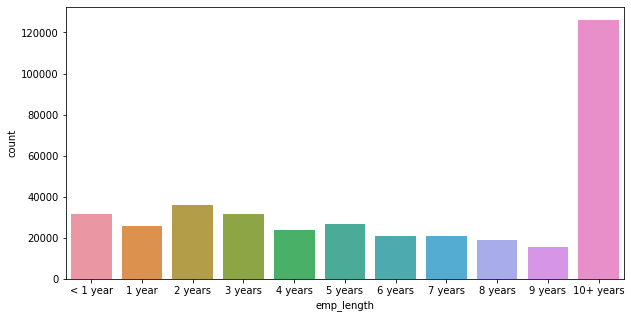

In [ ]:
plt.figure(figsize=(10,5))

sns.countplot(df['emp_length'], order=['< 1 year','1 year', '2 years', '3 years',"4 years",'5 years','6 years','7 years','8 years','9 years','10+ years' ])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


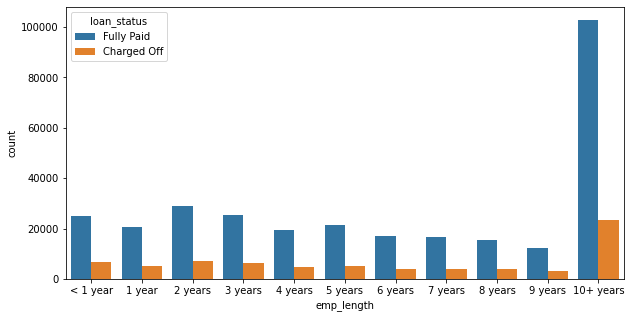

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df['emp_length'], hue=df['loan_status'], order=['< 1 year','1 year', '2 years', '3 years',"4 years",'5 years','6 years','7 years','8 years','9 years','10+ years' ])

In [ ]:
charged_off = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [ ]:
paid = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']


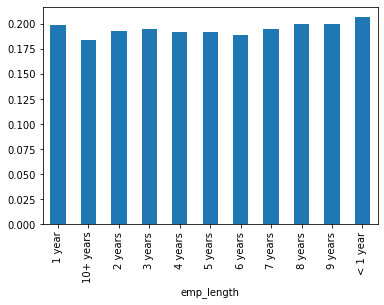

In [ ]:
percent = charged_off/(charged_off + paid)
percent.plot(kind= 'bar')

In [ ]:
df = df.drop('emp_length',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   home_ownership        396030 non-null  object 
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  object 
 9   issue_d               396030 non-null  object 
 10  loan_status           396030 non-null  object 
 11  purpose               396030 non-null  object 
 12  title                 394275 non-null  object 
 13  dti                   396030 non-null  float64
 14  earliest_cr_line      396030 non-null  object 
 15  

In [ ]:
df['title']

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

In [ ]:
df['purpose']

0                   vacation
1         debt_consolidation
2                credit_card
3                credit_card
4                credit_card
                 ...        
396025    debt_consolidation
396026    debt_consolidation
396027    debt_consolidation
396028    debt_consolidation
396029    debt_consolidation
Name: purpose, Length: 396030, dtype: object

In [ ]:
df = df.drop('title',axis=1)

In [ ]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [ ]:
df.corr()["mort_acc"]

loan_amnt               0.222290
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
Name: mort_acc, dtype: float64

In [ ]:
total_median_avrg = df.groupby('total_acc').median()['mort_acc']

In [ ]:
def fillNan(mort_acc, median_avrg):
    if np.isnan(mort_acc):
        return total_median_avrg[median_avrg]
    else:
        return mort_acc

In [ ]:
df['mort_acc'] = df.apply(lambda x: fillNan(x['mort_acc'], x['total_acc']),axis=1)

In [ ]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [ ]:
feature_info('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [ ]:
df.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.027523
4.0      0.046850
5.0      0.077416
6.0      0.120082
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [ ]:
df = df.dropna() 

In [ ]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [ ]:
df.select_dtypes(exclude=['float64'])

,term,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,initial_list_status,application_type,address,loan_repaid
0,36 months,B,B4,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,36 months,B,B5,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,36 months,B,B3,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,36 months,A,A2,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\nDelacruzside, MA 00813",1
4,60 months,C,C5,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,60 months,B,B4,RENT,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Nov-2004,w,INDIVIDUAL,"12951 Williams Crossing\nJohnnyville, DC 30723",1
396026,36 months,C,C1,MORTGAGE,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Feb-2006,f,INDIVIDUAL,"0114 Fowler Field Suite 028\nRachelborough, LA...",1
396027,36 months,B,B1,RENT,Verified,Oct-2013,Fully Paid,debt_consolidation,Mar-1997,f,INDIVIDUAL,"953 Matthew Points Suite 414\nReedfort, NY 70466",1
396028,60 months,C,C2,MORTGAGE,Verified,Aug-2012,Fully Paid,debt_consolidation,Nov-1990,f,INDIVIDUAL,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1


In [ ]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [ ]:
df['term'] = df.term.str.replace(' months','').astype(int)

In [ ]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

In [ ]:
df = df.drop('grade',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   sub_grade             395219 non-null  object 
 5   home_ownership        395219 non-null  object 
 6   annual_inc            395219 non-null  float64
 7   verification_status   395219 non-null  object 
 8   issue_d               395219 non-null  object 
 9   loan_status           395219 non-null  object 
 10  purpose               395219 non-null  object 
 11  dti                   395219 non-null  float64
 12  earliest_cr_line      395219 non-null  object 
 13  open_acc              395219 non-null  float64
 14  pub_rec               395219 non-null  float64
 15  

In [ ]:
subgrade_dummies = pd.get_dummies(df['sub_grade'], drop_first = True)

In [ ]:
df = pd.concat([df.drop("sub_grade",axis=1),subgrade_dummies],axis=1)

In [ ]:
more_dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']],drop_first = True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,more_dummies],axis=1)

In [ ]:
df['home_ownership'] = df['home_ownership'].replace('NONE', 'OTHER')
dum_own = pd.get_dummies(df['home_ownership'], drop_first = True)
df = df.drop('home_ownership', axis=1)
df = pd.concat([df,dum_own],axis=1)

In [ ]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [ ]:
df['zip_code'] = df['address'].apply(lambda x: int(x[-5:]))

In [ ]:
zip_dum = pd.get_dummies('zip_code', drop_first = True)
df = df.drop(['zip_code', 'address'],axis=1)
df = pd.concat([df,zip_dum],axis=1)

In [ ]:
df = df.drop('issue_d', axis=1)

In [ ]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: int(x[-4:]))
df = df.drop('earliest_cr_line', axis=1)

In [ ]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df = df.drop('loan_status',axis=1)

In [ ]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
model = Sequential()
model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
model.fit(
    x = X_over,
    y= y_over,
    epochs = 600,
    batch_size = 256,
    validation_data = (X_test, y_test),
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/600
1987/1987 [==============================] - 5s 3ms/step - loss: 0.6400 - val_loss: 0.6293
Epoch 2/600
1987/1987 [==============================] - 5s 3ms/step - loss: 0.6324 - val_loss: 0.6311
Epoch 3/600
1987/1987 [==============================] - 5s 3ms/step - loss: 0.6294 - val_loss: 0.6341
Epoch 4/600
1987/1987 [==============================] - 5s 3ms/step - loss: 0.6276 - val_loss: 0.6192
Epoch 5/600
1987/1987 [==============================] - 5s 3ms/step - loss: 0.6261 - val_loss: 0.6147
Epoch 6/600
1987/1987 [==============================] - 5s 3ms/step - loss: 0.6250 - val_loss: 0.6112
Epoch 7/600
1987/1987 [==============================] - 5s 2ms/step - loss: 0.6239 - val_loss: 0.6152
Epoch 8/600
1987/1987 [==============================] - 5s 3ms/step - loss: 0.6227 - val_loss: 0.6489
Epoch 9/600
1987/1987 [==============================] - 5s 3ms/step - loss: 0.6219 - val_loss: 0.6218
Epoch 10/600
1987/1987 [==============================] - 5s 2ms/step - l

In [ ]:
history = model.history

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.31      0.69      0.43     15658
           1       0.89      0.62      0.73     63386

    accuracy                           0.63     79044
   macro avg       0.60      0.65      0.58     79044
weighted avg       0.77      0.63      0.67     79044



In [ ]:
m1 = model.fit(
    x = X_train,
    y= y_train,
    epochs = 600,
    batch_size = 256,
    validation_data = (X_test, y_test),
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/600
1236/1236 [==============================] - 3s 3ms/step - loss: 0.4509 - val_loss: 0.4538
Epoch 2/600
1236/1236 [==============================] - 3s 3ms/step - loss: 0.4466 - val_loss: 0.4533
Epoch 3/600
1236/1236 [==============================] - 3s 3ms/step - loss: 0.4456 - val_loss: 0.4524
Epoch 4/600
1236/1236 [==============================] - 3s 3ms/step - loss: 0.4448 - val_loss: 0.4524
Epoch 5/600
1236/1236 [==============================] - 4s 3ms/step - loss: 0.4445 - val_loss: 0.4521
Epoch 6/600
1236/1236 [==============================] - 3s 3ms/step - loss: 0.4442 - val_loss: 0.4527
Epoch 7/600
1236/1236 [==============================] - 3s 3ms/step - loss: 0.4437 - val_loss: 0.4529
Epoch 8/600
1236/1236 [==============================] - 3s 3ms/step - loss: 0.4438 - val_loss: 0.4529
Epoch 9/600
1236/1236 [==============================] - 3s 3ms/step - loss: 0.4436 - val_loss: 0.4531
Epoch 10/600
1236/1236 [==============================] - 3s 3ms/step - l

In [ ]:
predictions_1 = model.predict_classes(X_test)

In [ ]:
print(classification_report(y_test,predictions_1))

              precision    recall  f1-score   support

           0       0.57      0.06      0.11     15658
           1       0.81      0.99      0.89     63386

    accuracy                           0.80     79044
   macro avg       0.69      0.52      0.50     79044
weighted avg       0.76      0.80      0.74     79044



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
predictions_2 = clf.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions_2,zero_division= 1))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00     15658
           1       0.80      1.00      0.89     63386

    accuracy                           0.80     79044
   macro avg       0.90      0.50      0.45     79044
weighted avg       0.84      0.80      0.71     79044



In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, y_train, cv=10)
scores


array([0.80432032, 0.80432032, 0.80432032, 0.80432032, 0.80432032,
       0.80434576, 0.80434576, 0.80434576, 0.80434576, 0.80434576])

In [ ]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

for feat, importance in zip(df.columns, clf.feature_importances_):
    print ('feature: {f}, importance: {i}'.format(f=feat, i=importance))


feature: loan_amnt, importance: 0.011052938497906593
feature: term, importance: 0.15855648189138602
feature: int_rate, importance: 0.28152471262744966
feature: installment, importance: 0.0038874057419496515
feature: annual_inc, importance: 0.06632911157622645
feature: dti, importance: 0.12086299184710683
feature: open_acc, importance: 2.061550878867944e-05
feature: pub_rec, importance: 1.1999811602895028e-05
feature: revol_bal, importance: 0.0
feature: revol_util, importance: 0.06193312223953195
feature: total_acc, importance: 4.200041120440352e-05
feature: mort_acc, importance: 0.03796195585102802
feature: pub_rec_bankruptcies, importance: 0.0
feature: loan_repaid, importance: 0.016643209386247745
feature: A2, importance: 0.0064108719310932314
feature: A3, importance: 0.048669211456777904
feature: A4, importance: 0.024944584754972365
feature: A5, importance: 0.01580509374866468
feature: B1, importance: 0.005212103889741143
feature: B2, importance: 0.0
feature: B3, importance: 0.004995

The capstone involved the use numerous Data Science techniques to accomplish the main goal. There were various features in the data so, there I made a fucntion that would provide the definition of each feature. This project taught me become more patient when Data has unsual tendencies. The data was also very unbalanced so using undersampling and over sampling techniques was a good idea but it didn't lead to better results. It could be because of the loss of Data when sampling. The Neural network and the random forest were both equally capable models but the neural network did have some success predicting the class with low occurances.   